In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np
import pandas as pd
from pathlib import Path
import itertools

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('./mpl/manuscript.mplstyle')
plt.rcParams['figure.figsize'] = 4, 4

In [2]:
experiments = {
    'single-source-low-r': 'Low reflectivity',
    'single-source-high-r': 'High reflectivity',
    'single-source-deep': 'Far source',
    'single-source-p-low': 'Low Poisson\'s ratio',
}

factor = 1e6

csv_path = '../../results/{name}/rms-amplitudes.csv'
data = pd.read_csv(csv_path.format(name='single-source'))

for name in experiments.keys():
    df = pd.read_csv(csv_path.format(name=name))
    data[name] = df['rms_amplitude']
        
data

,a_x,a_z,rms_amplitude,rms_reflectivity,single-source-low-r,single-source-high-r,single-source-deep,single-source-p-low
0,0.001,0.01,1.120450e-07,0.063559,2.213208e-08,4.572273e-07,6.391737e-08,9.746692e-08
1,0.001,0.05,1.436843e-07,0.050360,2.533583e-08,5.773190e-07,7.381052e-08,1.196442e-07
2,0.001,0.10,1.582132e-07,0.043156,2.679506e-08,6.607966e-07,7.226315e-08,1.186201e-07
3,0.001,0.50,1.318899e-07,0.029564,2.097345e-08,5.805732e-07,7.565603e-08,9.659133e-08
4,0.001,1.00,1.240558e-07,0.024277,2.066085e-08,5.522072e-07,6.786228e-08,9.164363e-08
5,0.010,0.01,1.076854e-07,0.063555,2.162459e-08,4.282501e-07,6.586329e-08,9.800858e-08
6,0.010,0.05,1.573814e-07,0.050318,2.814935e-08,6.699789e-07,7.552458e-08,1.326735e-07
7,0.010,0.10,1.596700e-07,0.043136,2.782288e-08,6.921183e-07,8.385698e-08,1.314608e-07
8,0.010,0.50,1.387708e-07,0.029573,2.283993e-08,6.091102e-07,7.246466e-08,9.968525e-08
9,0.010,1.00,1.158094e-07,0.024304,1.903781e-08,5.601280e-07,6.667119e-08,8.694937e-08


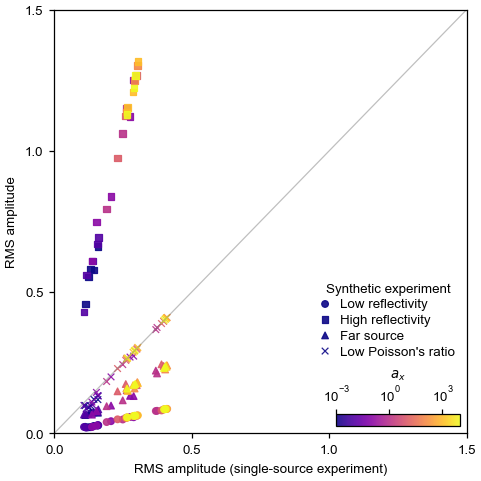

In [8]:
fig, ax = plt.subplots()

norm = colors.LogNorm(vmin=data['a_x'].min(), vmax=data['a_x'].max())
cmap = cm.plasma

markers = 'o', 's', '^', 'x'
assert len(markers) == len(experiments.keys())
marker = itertools.cycle(markers)

ax.plot([0, 1e3], [0, 1e3], '-', c='gray', alpha=0.5)
lim = 0, 1.5
ax.set(xlim=lim, ylim=lim, xlabel='RMS amplitude (single-source experiment)', ylabel='RMS amplitude')
ticks = np.arange(0, lim[1] + 0.01, 0.5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
    
for name in experiments.keys():
    im = ax.scatter(data['rms_amplitude'] * factor,
            data[name] * factor,
            c=data['a_x'],
            norm=colors.LogNorm(),
            marker=next(marker),
            alpha=0.9,
            cmap=cmap,
            label=experiments[name])

leg = ax.legend(loc='lower right', title='Synthetic experiment',
                bbox_to_anchor=(0, 0.15, 1, 0),
                bbox_transform=ax.transAxes, frameon=False)
ins = inset_axes(
    leg.axes,
    width='30%',  # width: 50% of parent_bbox width
    height='3%',  # height: 5%
    loc='lower right',
)
cbar = fig.colorbar(im, cax=ins, orientation='horizontal', )
cbar.set_label('$a_x$', labelpad=-35)
cbar.ax.xaxis.set_ticks_position('top')

In [9]:
fig.savefig('../../manuscript/figures/si_fig15.pdf')